In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.svm import SVC
from scipy.stats import zscore
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
sns.set(color_codes=True)

# Sports management

**CONTEXT**: Company X is a sports management company for international cricket. 

DATA DESCRIPTION: The data is collected belongs to batsman from IPL series conducted so far. Attribute Information:

1. Runs: Runs score by the batsman

2. Ave: Average runs scored by the batsman per match

3. SR: strike rate of the batsman

4. Fours: number of boundary/four scored

5. Six: number of boundary/six scored

6. HF: number of half centuries scored so far


• PROJECT OBJECTIVE: Goal is to build a data driven batsman ranking model for the sports management company to make business decisions.
Steps and tasks: [ Total Score: 5 points]


## **Import and warehouse data**

In [2]:
df= pd.read_csv("batting_bowling_ipl_bat.csv")

In [3]:
df

,Name,Runs,Ave,SR,Fours,Sixes,HF
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
175,PC Valthaty,30.0,5.00,58.82,4.0,0.0,0.0
176,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177,RP Singh,6.0,3.00,50.00,0.0,0.0,0.0
178,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    90 non-null     object 
 1   Runs    90 non-null     float64
 2   Ave     90 non-null     float64
 3   SR      90 non-null     float64
 4   Fours   90 non-null     float64
 5   Sixes   90 non-null     float64
 6   HF      90 non-null     float64
dtypes: float64(6), object(1)
memory usage: 10.0+ KB


In [5]:
df.describe()

,Runs,Ave,SR,Fours,Sixes,HF
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,219.933333,24.729889,119.164111,19.788889,7.577778,1.188889
std,156.253669,13.619215,23.656547,16.399845,8.001373,1.688656
min,2.000000,0.500000,18.180000,0.000000,0.000000,0.000000
25%,98.000000,14.665000,108.745000,6.250000,3.000000,0.000000
50%,196.500000,24.440000,120.135000,16.000000,6.000000,0.500000
75%,330.750000,32.195000,131.997500,28.000000,10.000000,2.000000
max,733.000000,81.330000,164.100000,73.000000,59.000000,9.000000


## Data cleansing

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df

,Name,Runs,Ave,SR,Fours,Sixes,HF
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0
...,...,...,...,...,...,...,...
171,Z Khan,12.0,6.00,70.58,1.0,0.0,0.0
173,WD Parnell,19.0,4.75,70.37,2.0,0.0,0.0
175,PC Valthaty,30.0,5.00,58.82,4.0,0.0,0.0
177,RP Singh,6.0,3.00,50.00,0.0,0.0,0.0


In [8]:
df.dropna(inplace=True)

In [9]:
df

,Name,Runs,Ave,SR,Fours,Sixes,HF
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0
...,...,...,...,...,...,...,...
171,Z Khan,12.0,6.00,70.58,1.0,0.0,0.0
173,WD Parnell,19.0,4.75,70.37,2.0,0.0,0.0
175,PC Valthaty,30.0,5.00,58.82,4.0,0.0,0.0
177,RP Singh,6.0,3.00,50.00,0.0,0.0,0.0


In [10]:
df.isnull().sum()

Name     0
Runs     0
Ave      0
SR       0
Fours    0
Sixes    0
HF       0
dtype: int64

In [11]:
df.isna().sum()

Name     0
Runs     0
Ave      0
SR       0
Fours    0
Sixes    0
HF       0
dtype: int64

## Data analysis & visualisation

array([[<AxesSubplot:title={'center':'Runs'}>,
        <AxesSubplot:title={'center':'Ave'}>],
       [<AxesSubplot:title={'center':'SR'}>,
        <AxesSubplot:title={'center':'Fours'}>],
       [<AxesSubplot:title={'center':'Sixes'}>,
        <AxesSubplot:title={'center':'HF'}>]], dtype=object)

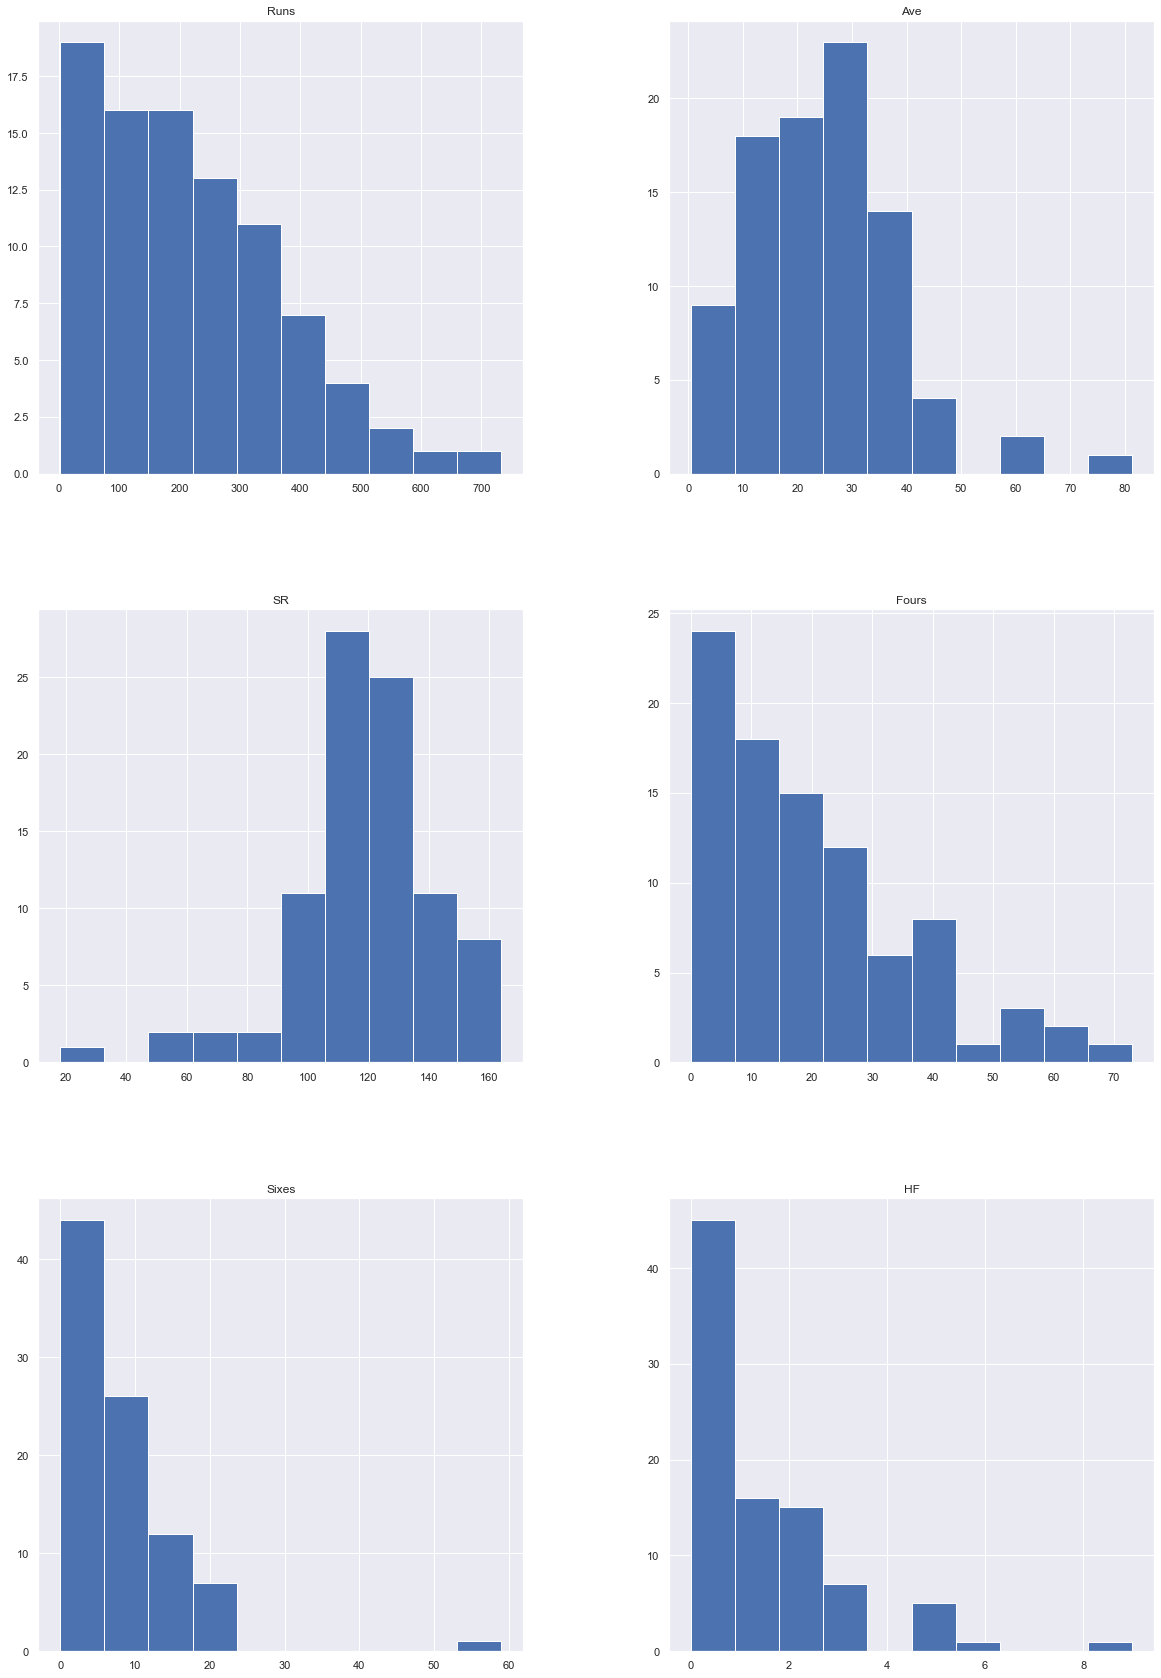

In [12]:
df.hist(figsize=(20,30))

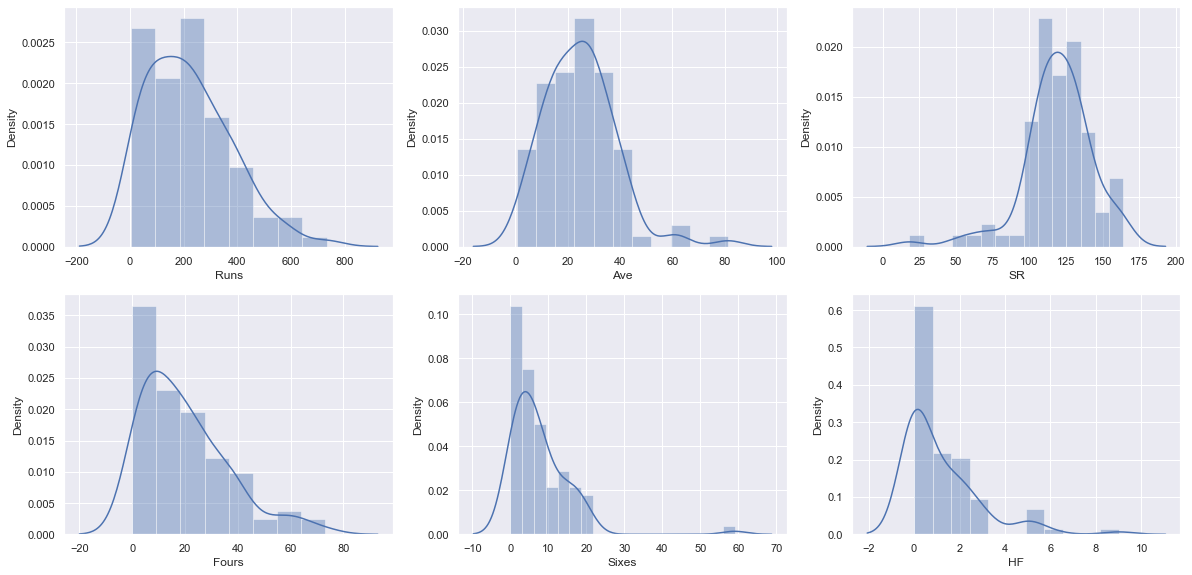

In [13]:
numericColumns = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(20, 15))
index = 1
for i in numericColumns:
    plt.subplot(3,3, index)
    sns.distplot(df[i], kde=True)
    index += 1 

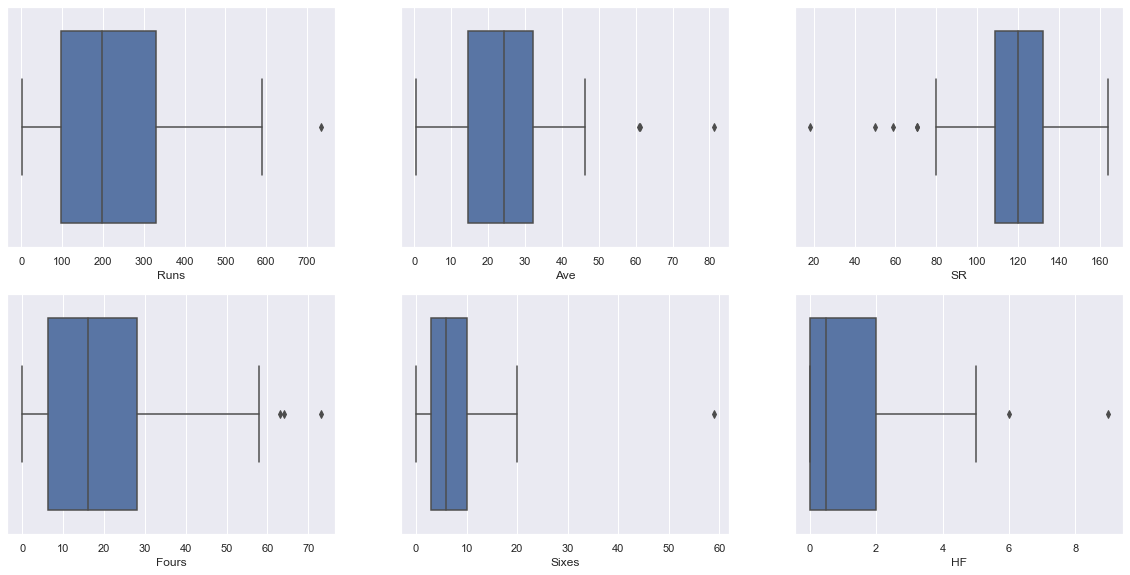

In [14]:
plt.figure(figsize=(20, 15))
index = 1
for i in numericColumns:
    plt.subplot(3, 3, index)
    sns.boxplot(df[i])
    index += 1 

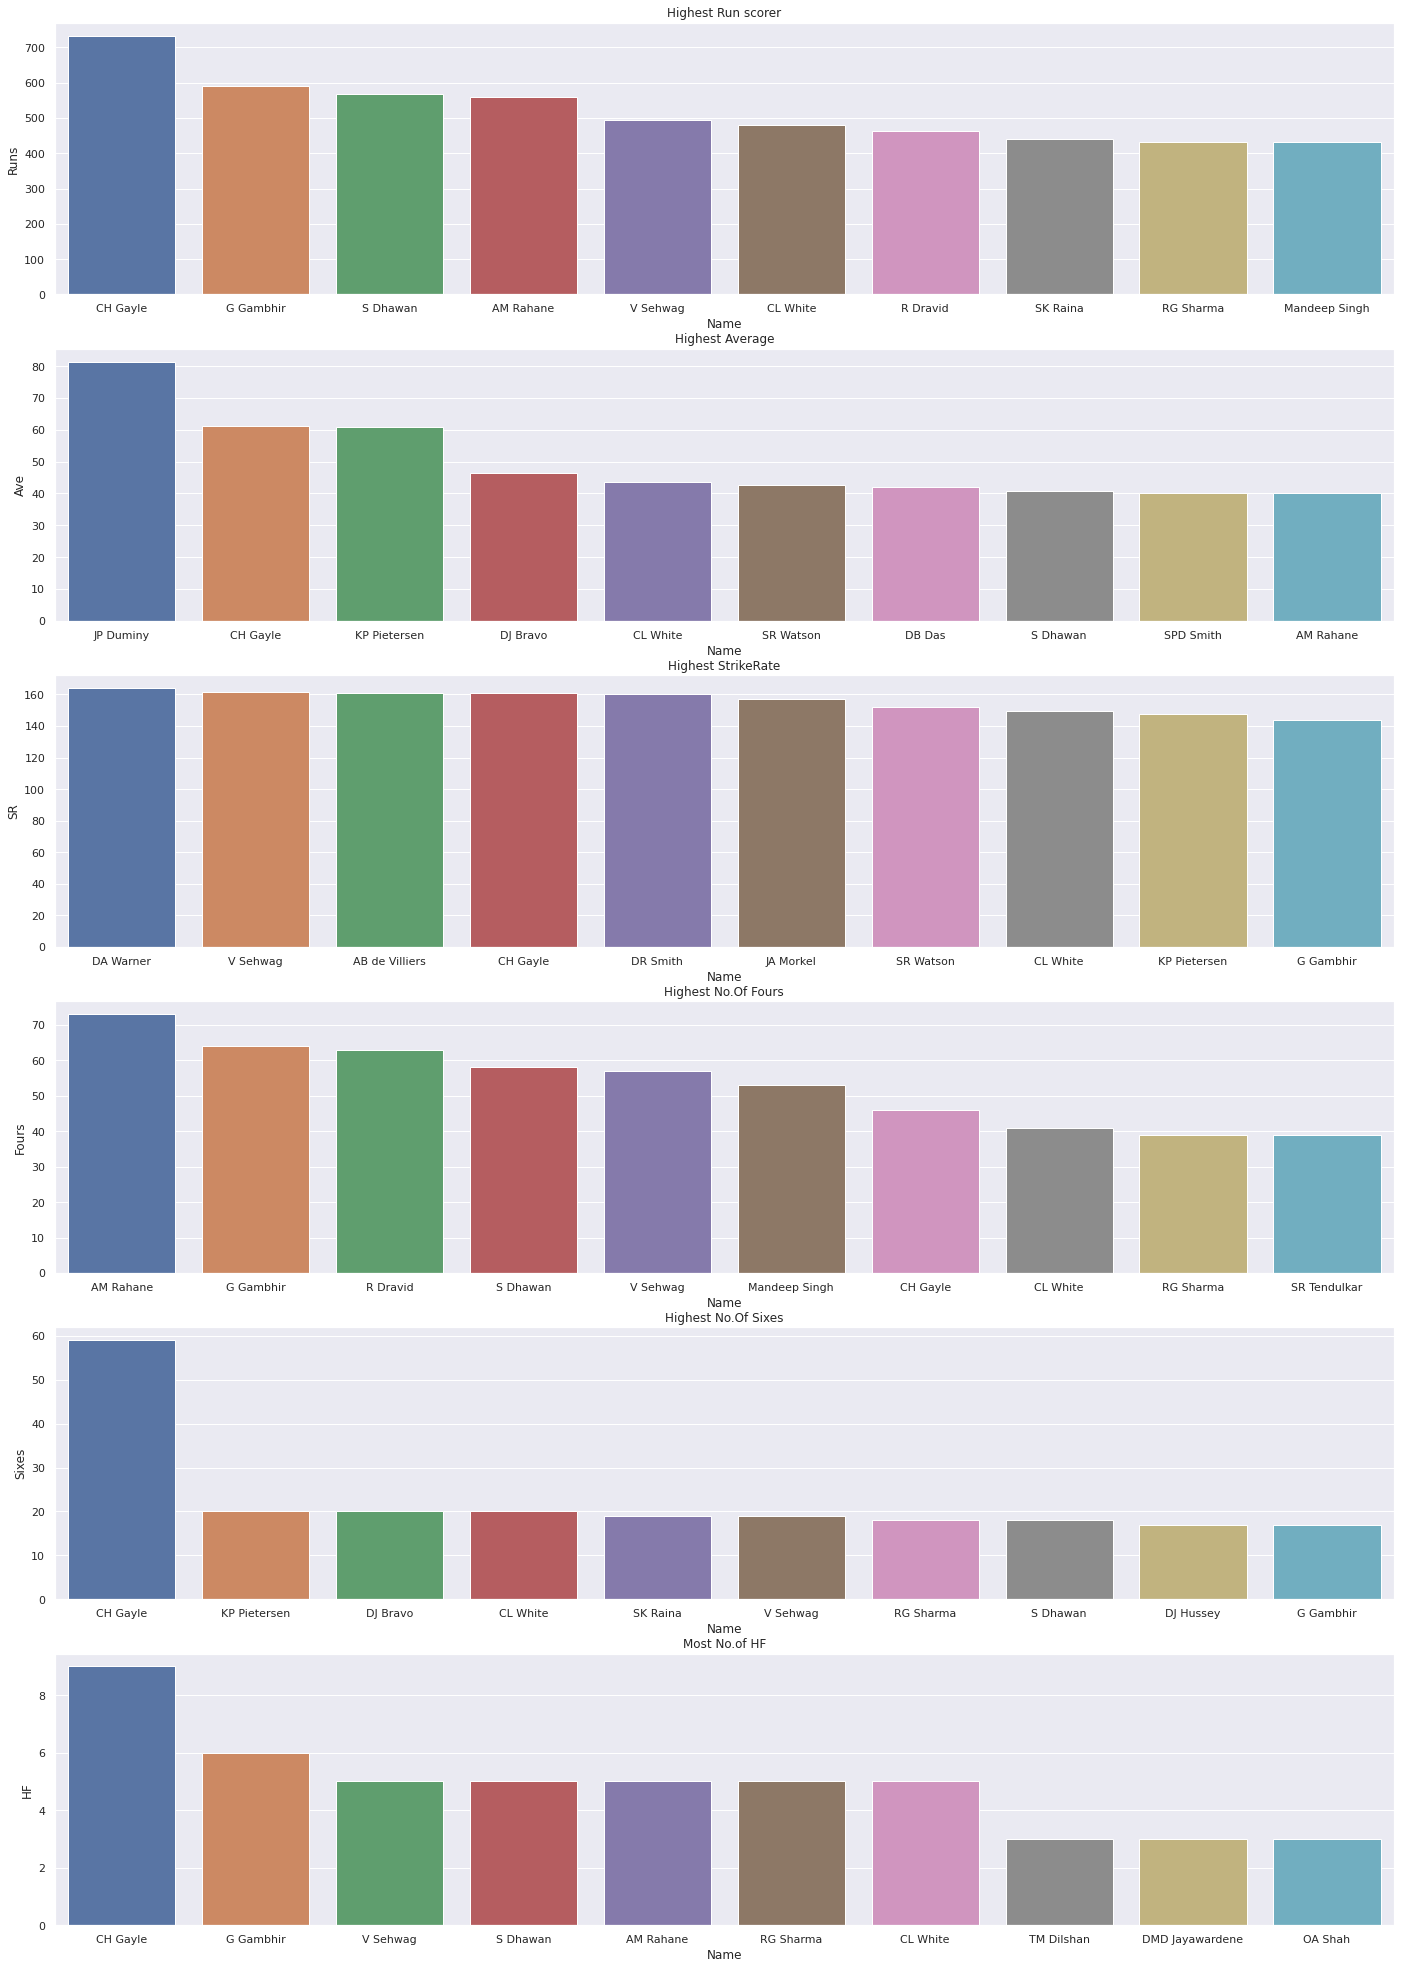

In [ ]:
fig, ax = plt.subplots(6,1)

fig.set_figheight(35)
fig.set_figwidth(24)

sns.barplot(x='Name',y='Runs', data=df.sort_values(by='Runs', ascending=False).head(10), ax=ax[0])

sns.barplot(x='Name',y='Ave', data=df.sort_values(by='Ave', ascending=False).head(10), ax=ax[1])

sns.barplot(x='Name',y='SR', data=df.sort_values(by='SR', ascending=False).head(10), ax=ax[2])
sns.barplot(x='Name',y='Fours', data=df.sort_values(by='Fours', ascending=False).head(10), ax=ax[3])
sns.barplot(x='Name',y='Sixes', data=df.sort_values(by='Sixes', ascending=False).head(10), ax=ax[4])
sns.barplot(x='Name',y='HF', data=df.sort_values(by='HF', ascending=False).head(10), ax=ax[5])

ax[0].set_title('Highest Run scorer')
ax[1].set_title('Highest Average')
ax[2].set_title('Highest StrikeRate')
ax[3].set_title('Highest No.Of Fours')
ax[4].set_title('Highest No.Of Sixes')
ax[5].set_title('Most No.of HF')
plt.show()

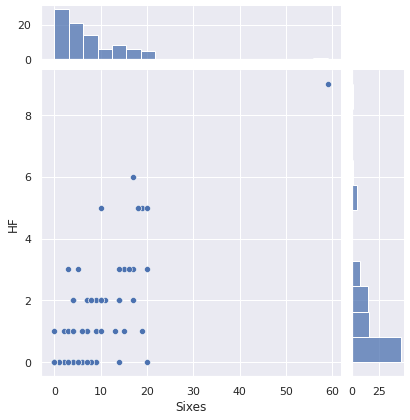

In [ ]:
sns.jointplot(df['Sixes'], df['HF'], marginal_ticks=True)

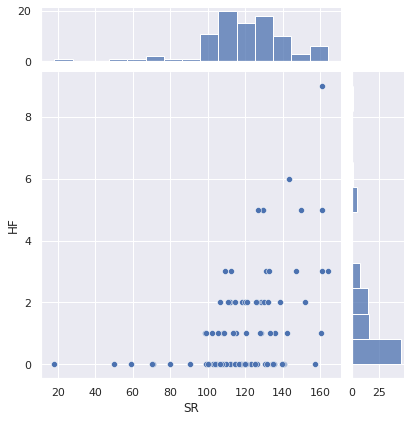

In [ ]:
sns.jointplot(df['SR'], df['HF'], marginal_ticks=True)

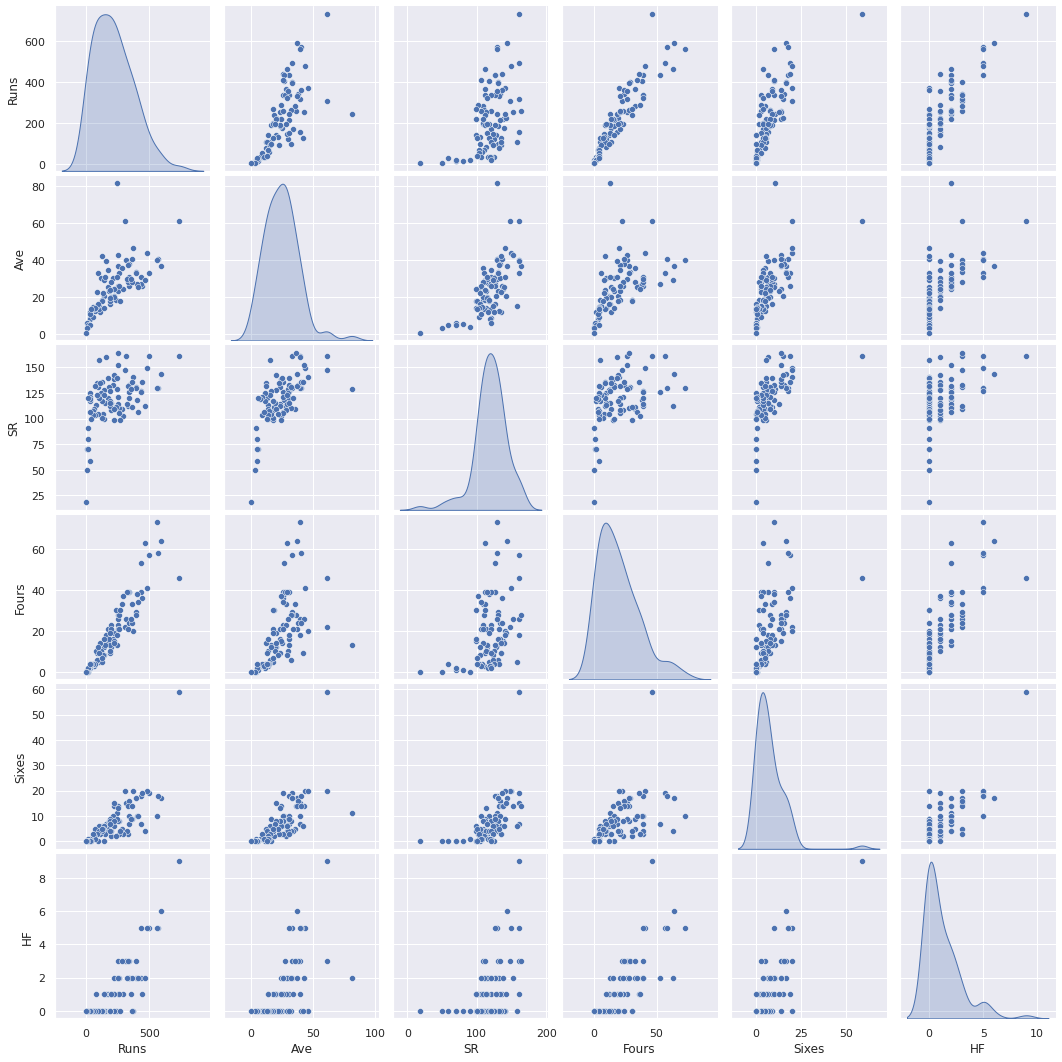

In [ ]:
sns.pairplot(df, diag_kind="kde")

In [ ]:
df.corr()

,Runs,Ave,SR,Fours,Sixes,HF
Runs,1.000000,0.692984,0.493489,0.918809,0.769778,0.835148
Ave,0.692984,1.000000,0.623606,0.546211,0.682414,0.620754
SR,0.493489,0.623606,1.000000,0.384810,0.583943,0.427584
Fours,0.918809,0.546211,0.384810,1.000000,0.522574,0.783689
Sixes,0.769778,0.682414,0.583943,0.522574,1.000000,0.767696
HF,0.835148,0.620754,0.427584,0.783689,0.767696,1.000000


## Data Preprocessing

In [ ]:
X = df.drop(['Name'], axis=1)

In [ ]:
X

,Runs,Ave,SR,Fours,Sixes,HF
1,733.0,61.08,160.74,46.0,59.0,9.0
3,590.0,36.87,143.55,64.0,17.0,6.0
5,495.0,33.00,161.23,57.0,19.0,5.0
7,479.0,43.54,149.68,41.0,20.0,5.0
9,569.0,40.64,129.61,58.0,18.0,5.0
...,...,...,...,...,...,...
171,12.0,6.00,70.58,1.0,0.0,0.0
173,19.0,4.75,70.37,2.0,0.0,0.0
175,30.0,5.00,58.82,4.0,0.0,0.0
177,6.0,3.00,50.00,0.0,0.0,0.0


In [ ]:
XScaled = X.apply(zscore)

In [ ]:
XScaled

,Runs,Ave,SR,Fours,Sixes,HF
1,3.301945,2.683984,1.767325,1.607207,6.462679,4.651551
3,2.381639,0.896390,1.036605,2.710928,1.184173,2.865038
5,1.770248,0.610640,1.788154,2.281703,1.435530,2.269533
7,1.667276,1.388883,1.297182,1.300618,1.561209,2.269533
9,2.246490,1.174755,0.444038,2.343021,1.309851,2.269533
...,...,...,...,...,...,...
171,-1.338197,-1.382959,-2.065234,-1.152093,-0.952365,-0.707989
173,-1.293147,-1.475256,-2.074160,-1.090775,-0.952365,-0.707989
175,-1.222355,-1.456796,-2.565132,-0.968140,-0.952365,-0.707989
177,-1.376812,-1.604470,-2.940057,-1.213411,-0.952365,-0.707989


## Clustering

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

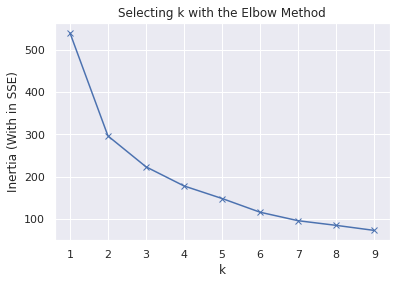

In [ ]:
#Identifying the optimal nunmber of clusters

clusters=range(1,10)
sse=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(XScaled)
    sse.append(model.inertia_)

plt.plot(clusters, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia (With in SSE)')
plt.title('Selecting k with the Elbow Method')

In [ ]:
kmeansClustering = KMeans(2)
kmeansClustering.fit(XScaled)
labels = kmeansClustering.predict(XScaled)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [ ]:
print(silhouette_score(XScaled,labels))

0.41111085574076756


In [ ]:
df['Group']=labels

In [ ]:
df['Group'] = df['Group'].replace({0: 'Group A', 1: 'Group B'})

In [ ]:
df

,Name,Runs,Ave,SR,Fours,Sixes,HF,Group
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0,Group B
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0,Group B
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0,Group B
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0,Group B
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0,Group B
...,...,...,...,...,...,...,...,...
171,Z Khan,12.0,6.00,70.58,1.0,0.0,0.0,Group A
173,WD Parnell,19.0,4.75,70.37,2.0,0.0,0.0,Group A
175,PC Valthaty,30.0,5.00,58.82,4.0,0.0,0.0,Group A
177,RP Singh,6.0,3.00,50.00,0.0,0.0,0.0,Group A


In [ ]:
#aggregating the numerical variable with the clusters formed with the mean
aggdata=df.groupby('Group').mean()
aggdata['Freq']=df.Group.value_counts().sort_index()
aggdata

,Runs,Ave,SR,Fours,Sixes,HF,Freq
Group,,,,,,,
Group A,122.745455,17.582000,110.481455,10.309091,3.636364,0.218182,55
Group B,372.657143,35.962286,132.808286,34.685714,13.771429,2.714286,35


## Conclusion

1) Given data has more duplicates

2) We need to remove the duplicate records

3) Fours has the highest contribution in runs

4) Fours & Sixes has correlation Half centuries

5) Even we have some outliers in the data, we are not treating them, thinking those are the right records

6) We applied KMeans clustering on the data, it gives good silhouette score for 2 clusters

7) So the entire players were divided into 2 groups Group A & Group Becuase

8) Group B with highest average, and best batsmans

9) Group A with seems like bowlers ( lower average, less runs)